In [106]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fdf = pd.read_csv('working-csvs/fomc_w_topics.csv', index_col=0)

In [3]:
fdf.columns

Index(['date', 'speaker', 'text_enhanced', 'tokens', 'tprob_0', 'tprob_1',
       'tprob_2', 'tprob_3', 'tprob_4', 'tprob_5', 'tprob_6', 'tprob_7',
       'tprob_8', 'tprob_9', 'tprob_10', 'tprob_11', 'tprob_12', 'tprob_13',
       'tprob_14', 'tprob_15', 'tprob_16', 'tprob_17', 'tprob_18', 'tprob_19',
       'tprob_20', 'tprob_21', 'tprob_22', 'tprob_23', 'tprob_24', 'tprob_25',
       'tprob_26', 'tprob_27', 'tprob_28', 'tprob_29', 'tprob_30', 'tprob_31',
       'tprob_32', 'tprob_33', 'tprob_34', 'tprob_35', 'tprob_36', 'tprob_37',
       'tprob_38', 'tprob_39', 'tprob_40', 'tprob_41', 'tprob_42', 'tprob_43',
       'tprob_44', 'len', 'lname', 'is_fomc', 'fed_exp'],
      dtype='object')

In [4]:
trpob_cols = [f'tprob_{i}' for i in range(45)]

In [5]:
fdf[[f'tprob_{i}_avg' for i in range(45)]] = fdf.groupby('date')[trpob_cols].transform('mean')
# fdf.groupby('date')[trpob_cols].mean().reset_index()[trpob_cols]

# fdf[trpob_cols].mean()

In [6]:
fdf.head()

,date,speaker,text_enhanced,tokens,tprob_0,tprob_1,tprob_2,tprob_3,tprob_4,tprob_5,...,tprob_35_avg,tprob_36_avg,tprob_37_avg,tprob_38_avg,tprob_39_avg,tprob_40_avg,tprob_41_avg,tprob_42_avg,tprob_43_avg,tprob_44_avg
1696,1994-02-04,CHAIRMAN GREENSPAN.,"As you know, this is our organizational meetin...","['know', 'organiz', 'meet', 'alway', 'meet', '...",0.002360,0.001847,0.002183,0.080568,0.031129,0.001038,...,0.00963,0.016656,0.011385,0.008738,0.011269,0.008637,0.017393,0.012649,0.076129,0.015007
1698,1994-02-04,MR. BOEHNE.,"Normally in an economic expansion, development...","['normal', 'econom', 'expans', 'develop', 'rea...",0.005527,0.006127,0.005889,0.045383,0.098863,0.003816,...,0.00963,0.016656,0.011385,0.008738,0.011269,0.008637,0.017393,0.012649,0.076129,0.015007
1699,1994-02-04,MR. BROADDUS.,My report is going to be pretty bland after th...,"['report', 'go', 'pretti', 'bland', 'develop',...",0.006002,0.012405,0.006998,0.094474,0.018949,0.003959,...,0.00963,0.016656,0.011385,0.008738,0.011269,0.008637,0.017393,0.012649,0.076129,0.015007
1703,1994-02-04,MR. FORRESTAL.,"Joan, do you have an ""add need"" tomorrow as we...","['joan', 'add', 'need', 'tomorrow', 'well', 'w...",0.020140,0.091074,0.006324,0.057786,0.028165,0.022221,...,0.00963,0.016656,0.011385,0.008738,0.011269,0.008637,0.017393,0.012649,0.076129,0.015007
1704,1994-02-04,MR. HOENIG.,"Mr. Chairman, our District continues to grow a...","['mr', 'chairman', 'district', 'continu', 'gro...",0.012011,0.040295,0.013197,0.111359,0.062660,0.007633,...,0.00963,0.016656,0.011385,0.008738,0.011269,0.008637,0.017393,0.012649,0.076129,0.015007


In [7]:
avg_tprob_cols = [f'tprob_{i}_avg' for i in range(45)]
tprob_cols = [f'tprob_{i}' for i in range(45)]

In [8]:
def similarities(probs):
    dp = 0
    bc = 0
    kl = 0
    for i in range(45):
        avg_comp = probs[f'tprob_{i}_avg']
        ind_comp = probs[f'tprob_{i}']
        prod = ind_comp * avg_comp
        bc += math.sqrt(prod)
        dp += prod
        kl += avg_comp * math.log(avg_comp / ind_comp)

    kl = math.exp(-1 * kl)
    dp = 1 - dp
    return pd.Series([dp, bc, kl], index=['Dot Product Similarity', 'Bhattacharyya Coef', 'KL'])

In [9]:
fdf[['dpsim', 'bcsim', 'kl']] = fdf[trpob_cols + avg_tprob_cols].apply(similarities, axis=1)

In [10]:
fdf['date'] = pd.to_datetime(fdf['date'])

Text(0.5, 1.0, 'Similarity in Topic Distributions to Committee Average')

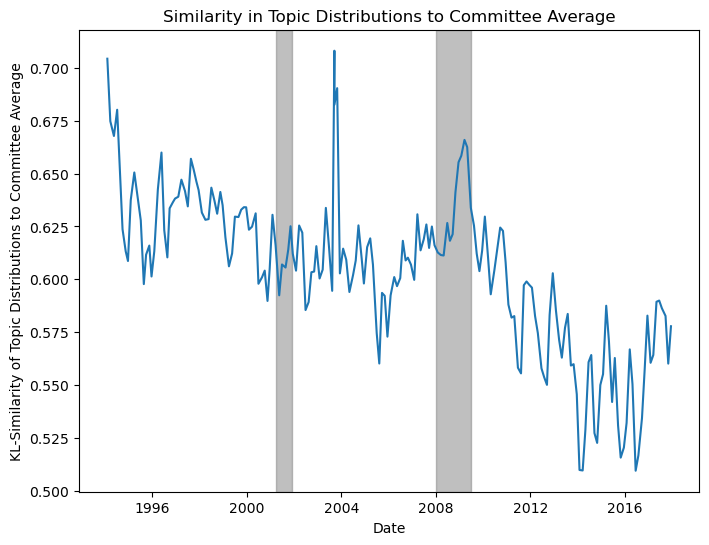

In [148]:
# plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8,6))
new_df = fdf.groupby('date')[['dpsim', 'bcsim', 'kl']].mean().reset_index()
ax.plot(new_df['date'], new_df.groupby('date')['kl'].mean().rolling('60D').mean())


ax.axvspan('2001-04-01', '2001-11-30', color='gray', alpha=0.5)
ax.axvspan('2008-01-01', '2009-06-30', color='gray', alpha=0.5)

# ax.legend(['Below 25th Percentile Fed Experience', 'At or Above 25th Percentile Fed Experience'])
ax.set_ylabel('KL-Similarity of Topic Distributions to Committee Average')
ax.set_xlabel('Date')
ax.set_title('Similarity in Topic Distributions to Committee Average')

In [117]:
fdf[fdf['date'] == '2003-09-15'].loc[3701][avg_tprob_cols]

tprob_0_avg     0.009156
tprob_1_avg      0.00762
tprob_2_avg     0.006795
tprob_3_avg     0.027132
tprob_4_avg     0.070112
tprob_5_avg     0.005426
tprob_6_avg      0.00761
tprob_7_avg      0.09073
tprob_8_avg     0.007276
tprob_9_avg      0.00712
tprob_10_avg    0.006184
tprob_11_avg    0.021469
tprob_12_avg    0.006353
tprob_13_avg    0.010369
tprob_14_avg    0.009334
tprob_15_avg    0.012158
tprob_16_avg    0.009687
tprob_17_avg    0.005598
tprob_18_avg    0.013329
tprob_19_avg    0.009321
tprob_20_avg    0.017973
tprob_21_avg    0.017795
tprob_22_avg    0.009493
tprob_23_avg    0.033476
tprob_24_avg    0.009357
tprob_25_avg    0.035326
tprob_26_avg    0.015499
tprob_27_avg     0.00806
tprob_28_avg    0.011442
tprob_29_avg    0.016721
tprob_30_avg    0.034334
tprob_31_avg    0.008168
tprob_32_avg    0.007034
tprob_33_avg    0.272347
tprob_34_avg    0.008297
tprob_35_avg    0.016672
tprob_36_avg    0.006231
tprob_37_avg    0.010242
tprob_38_avg     0.01177
tprob_39_avg    0.007172


In [39]:

fdf[fdf['date'] == '2005-08-09'].loc[4132][['speaker', 'kl'] + tprob_cols]

speaker     CHAIRMAN GREENSPAN.
kl                     0.271186
tprob_0                0.001939
tprob_1                0.025932
tprob_2                0.001935
tprob_3                0.007385
tprob_4                0.019716
tprob_5                0.012416
tprob_6                0.001649
tprob_7                0.009472
tprob_8                0.050597
tprob_9                 0.00207
tprob_10               0.064407
tprob_11               0.002322
tprob_12               0.003047
tprob_13               0.002129
tprob_14               0.002751
tprob_15               0.004979
tprob_16               0.001729
tprob_17               0.001671
tprob_18               0.009652
tprob_19               0.029107
tprob_20               0.002269
tprob_21               0.007491
tprob_22               0.002372
tprob_23               0.030108
tprob_24               0.005901
tprob_25               0.001791
tprob_26               0.003363
tprob_27               0.004431
tprob_28               0.014785
tprob_29

In [19]:

sim = fdf.groupby('date')[['dpsim', 'bcsim', 'kl']].mean()['kl'].rolling('60D').mean()

In [20]:
sim[(sim.index > '2004-01-01') & (sim.index < '2006-01-01')]

date
2004-01-28    0.614519
2004-03-16    0.609275
2004-05-04    0.594041
2004-06-30    0.602104
2004-08-10    0.608930
2004-09-21    0.625505
2004-11-10    0.609765
2004-12-14    0.598053
2005-02-02    0.615191
2005-03-22    0.619375
2005-05-03    0.606941
2005-06-30    0.574684
2005-08-09    0.560243
2005-09-20    0.593611
2005-11-01    0.592206
2005-12-13    0.572937
Name: kl, dtype: float64

In [1]:
fdf.groupby('date')[['dpsim', 'bcsim']].mean()['dpsim'].rolling('60D').mean().plot()

NameError: name 'fdf' is not defined

Incorporating Experience

In [11]:
fdf['lt2yrs'] = fdf['fed_exp'] < 2

In [13]:
fdf['lt2yrs'].value_counts()

lt2yrs
False    2638
True      728
Name: count, dtype: int64

In [32]:
by_exp = fdf.groupby(['date', 'lt2yrs'])[['dpsim', 'bcsim', 'kl']].mean().reset_index()
by_exp


,date,lt2yrs,dpsim,bcsim,kl
0,1994-02-04,False,0.961376,0.909589,0.700633
1,1994-02-04,True,0.959786,0.919906,0.719887
2,1994-03-22,False,0.955788,0.897902,0.650491
3,1994-03-22,True,0.953233,0.887520,0.610850
4,1994-05-17,False,0.953245,0.905068,0.674613
...,...,...,...,...,...
379,2017-09-20,True,0.916202,0.913713,0.698264
380,2017-11-01,False,0.915648,0.842828,0.510671
381,2017-11-01,True,0.927412,0.882032,0.617989
382,2017-12-13,False,0.912751,0.866678,0.577384


Text(0.5, 1.0, 'Similarity in Topic Distributions by Absolute Fed Experience')

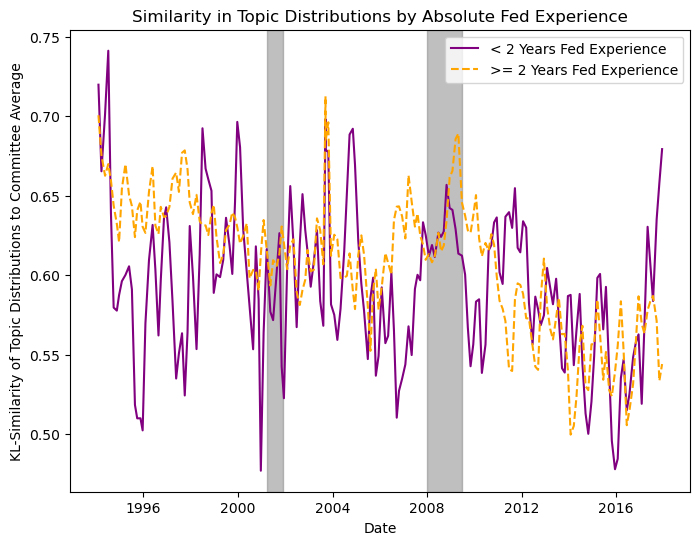

In [140]:
fig,ax = plt.subplots(figsize=(8,6))
lt2 = by_exp[by_exp['lt2yrs'] == True]
mt2 = by_exp[by_exp['lt2yrs'] == False]

ax.plot(lt2['date'], lt2.groupby('date')['kl'].mean().rolling('60D').mean(), color='purple')
ax.plot(mt2['date'], mt2.groupby('date')['kl'].mean().rolling('60D').mean(), color='orange', linestyle='--')

ax.axvspan('2001-04-01', '2001-11-30', color='gray', alpha=0.5)
ax.axvspan('2008-01-01', '2009-06-30', color='gray', alpha=0.5)

ax.legend(['< 2 Years Fed Experience', '>= 2 Years Fed Experience'])
ax.set_ylabel('KL-Similarity of Topic Distributions to Committee Average')
ax.set_xlabel('Date')
ax.set_title('Similarity in Topic Distributions by Absolute Fed Experience')

Text(0.5, 1.0, 'Similarity in Topic Distributions by Relative Fed Experience')

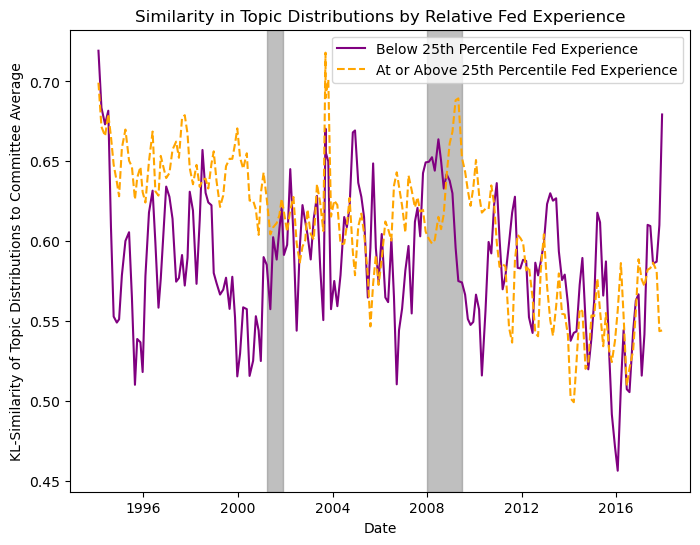

In [139]:
fdf['exp25pct'] = fdf.groupby('date')['fed_exp'].transform(lambda x: np.percentile(x, 25))
fdf['lt25pctexp'] = fdf['fed_exp'] < fdf['exp25pct']

by_exp_pct = fdf.groupby(['date', 'lt25pctexp'])['kl'].mean().reset_index()

lt25 = by_exp_pct[by_exp_pct['lt25pctexp'] == True]
mt25 = by_exp_pct[by_exp_pct['lt25pctexp'] == False]

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(lt25['date'], lt25.groupby('date')['kl'].mean().rolling('60D').mean(), color='purple')
ax.plot(mt25['date'], mt25.groupby('date')['kl'].mean().rolling('60D').mean(), color='orange', linestyle='--')

ax.axvspan('2001-04-01', '2001-11-30', color='gray', alpha=0.5)
ax.axvspan('2008-01-01', '2009-06-30', color='gray', alpha=0.5)

ax.legend(['Below 25th Percentile Fed Experience', 'At or Above 25th Percentile Fed Experience'])
ax.set_ylabel('KL-Similarity of Topic Distributions to Committee Average')
ax.set_xlabel('Date')
ax.set_title('Similarity in Topic Distributions by Relative Fed Experience')